## 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("2020 HR Data Analytics 데이터 (사후과제시 열람).xlsx", sheet_name = 1, columns=['성별', '길이', '지름', '높이', '총무게', '속살무게', '내장무게', '나이'])

In [3]:
data

,ID,성별,길이,지름,높이,총무게,속살무게,내장무게,나이
0,1,M,4.55,3.65,0.95,0.5140,0.2245,0.1010,15
1,2,M,3.50,2.65,0.90,0.2255,0.0995,0.0485,7
2,3,F,5.30,4.20,1.35,0.6770,0.2565,0.1415,9
3,4,M,4.40,3.65,1.25,0.5160,0.2155,0.1140,10
4,5,I,3.30,2.55,0.80,0.2050,0.0895,0.0395,7
...,...,...,...,...,...,...,...,...,...
4172,4173,F,5.65,4.50,1.65,0.8870,0.3700,0.2390,11
4173,4174,M,5.90,4.40,1.35,0.9660,0.4390,0.2145,10
4174,4175,M,6.00,4.75,2.05,1.1760,0.5255,0.2875,9
4175,4176,F,6.25,4.85,1.50,1.0945,0.5310,0.2610,10


In [4]:
4177 * 0.8

3341.6000000000004

In [5]:
train_data = data[:3341]
test_data = data[3341:]

In [6]:
x_train = train_data.drop("나이", axis=1)
x_train = x_train.drop("ID", axis=1)
y_train = train_data["나이"]

x_test = test_data.drop("나이", axis=1)
x_test = x_test.drop("ID", axis=1)
y_test = test_data["나이"]

In [7]:
x_train

,성별,길이,지름,높이,총무게,속살무게,내장무게
0,M,4.55,3.65,0.95,0.5140,0.2245,0.1010
1,M,3.50,2.65,0.90,0.2255,0.0995,0.0485
2,F,5.30,4.20,1.35,0.6770,0.2565,0.1415
3,M,4.40,3.65,1.25,0.5160,0.2155,0.1140
4,I,3.30,2.55,0.80,0.2050,0.0895,0.0395
...,...,...,...,...,...,...,...
3336,F,4.50,3.50,1.25,0.4435,0.1850,0.0900
3337,I,6.60,5.25,1.80,1.6935,0.6025,0.4005
3338,F,6.85,5.25,1.75,1.7100,0.5415,0.3090
3339,F,5.85,4.75,1.85,0.8575,0.3465,0.1785


In [8]:
y_train

0       15
1        7
2        9
3       10
4        7
        ..
3336    11
3337    15
3338    16
3339    12
3340    17
Name: 나이, Length: 3341, dtype: int64

In [9]:
import numpy as np

In [10]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [11]:
x_train

array([['M', 4.55, 3.65, ..., 0.514, 0.2245, 0.101],
       ['M', 3.5, 2.6500000000000004, ..., 0.2255, 0.0995, 0.0485],
       ['F', 5.300000000000001, 4.2, ..., 0.677, 0.2565, 0.1415],
       ...,
       ['F', 6.8500000000000005, 5.25, ..., 1.71, 0.5415, 0.309],
       ['F', 5.85, 4.75, ..., 0.8575, 0.3465, 0.1785],
       ['I', 5.4, 4.35, ..., 0.97, 0.4285, 0.22]], dtype=object)

In [12]:
y_train

array([15,  7,  9, ..., 16, 12, 17], dtype=int64)

## 데이터 정규화하기

#### 성별 데이터 변형

In [13]:
for arr in x_train:
    if arr[0] == 'M':
        arr[0] = 1
    elif arr[0] == 'I':
        arr[0] = 0.5
    elif arr[0] == 'F':
        arr[0] = 0

In [14]:
for arr in x_test:
    if arr[0] == 'M':
        arr[0] = 1
    elif arr[0] == 'I':
        arr[0] = 0.5
    elif arr[0] == 'F':
        arr[0] = 0

In [15]:
x_train

array([[1, 4.55, 3.65, ..., 0.514, 0.2245, 0.101],
       [1, 3.5, 2.6500000000000004, ..., 0.2255, 0.0995, 0.0485],
       [0, 5.300000000000001, 4.2, ..., 0.677, 0.2565, 0.1415],
       ...,
       [0, 6.8500000000000005, 5.25, ..., 1.71, 0.5415, 0.309],
       [0, 5.85, 4.75, ..., 0.8575, 0.3465, 0.1785],
       [0.5, 5.4, 4.35, ..., 0.97, 0.4285, 0.22]], dtype=object)

In [16]:
x_test

array([[0, 4.9, 3.9000000000000004, ..., 0.59, 0.215, 0.125],
       [1, 4.3, 3.3000000000000003, ..., 0.34, 0.1315, 0.085],
       [0, 4.55, 3.65, ..., 0.385, 0.166, 0.046],
       ...,
       [1, 6.0, 4.75, ..., 1.176, 0.5255, 0.2875],
       [0, 6.25, 4.85, ..., 1.0945, 0.531, 0.261],
       [1, 7.1, 5.550000000000001, ..., 1.9485, 0.9455, 0.3765]],
      dtype=object)

In [17]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

In [18]:
mean = x_train.mean(axis=0)

In [19]:
mean

array([0.52514217, 5.26150853, 4.116088  , 1.40383119, 0.8359578 ,
       0.36180844, 0.18219336])

In [20]:
x_train -= mean

In [21]:
x_train

array([[ 0.47485783, -0.71150853, -0.466088  , ..., -0.3219578 ,
        -0.13730844, -0.08119336],
       [ 0.47485783, -1.76150853, -1.466088  , ..., -0.6104578 ,
        -0.26230844, -0.13369336],
       [-0.52514217,  0.03849147,  0.083912  , ..., -0.1589578 ,
        -0.10530844, -0.04069336],
       ...,
       [-0.52514217,  1.58849147,  1.133912  , ...,  0.8740422 ,
         0.17969156,  0.12680664],
       [-0.52514217,  0.58849147,  0.633912  , ...,  0.0215422 ,
        -0.01530844, -0.00369336],
       [-0.02514217,  0.13849147,  0.233912  , ...,  0.1340422 ,
         0.06669156,  0.03780664]])

In [22]:
std = x_train.std(axis=0)

In [23]:
std

array([0.41697305, 1.18625206, 1.31797632, 0.37956282, 0.48498118,
       0.21916921, 0.10821211])

In [24]:
x_train /= std

In [25]:
x_train

array([[ 1.13882139, -0.5997954 , -0.35363913, ..., -0.66385628,
        -0.62649511, -0.7503167 ],
       [ 1.13882139, -1.48493612, -1.1123781 , ..., -1.25872473,
        -1.19683069, -1.23547496],
       [-1.25941514,  0.03244797,  0.06366731, ..., -0.32776076,
        -0.4804892 , -0.37605176],
       ...,
       [-1.25941514,  1.33908426,  0.86034323, ...,  1.80221882,
         0.81987592,  1.17183411],
       [-1.25941514,  0.49609311,  0.48097374, ...,  0.04441864,
        -0.06984759, -0.0341307 ],
       [-0.06029688,  0.11674708,  0.17747815, ...,  0.2763864 ,
         0.30429255,  0.34937535]])

In [26]:
x_test -= mean
x_test /= std

## 모델 정의하기

In [27]:
from keras import models, layers

In [28]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## 단순 홀드아웃 검증 (hold-out validation)

In [56]:
x_train.shape

(3341, 7)

In [58]:
3341 /8 *3

1252.875

In [60]:
num_validation_samples = 1253

num_epochs = 300

np.random.shuffle(x_train) # 데이터를 섞는 것이 일반적으로 좋다.

x_val = x_train[:num_validation_samples]
y_val = y_train[:num_validation_samples]

x_training = x_train[num_validation_samples:]
y_training = y_train[num_validation_samples:]

model = build_model()
history = model.fit(x_training, y_training, epochs=num_epochs, validation_data=(x_val, y_val), batch_size=1, verbose=0)

In [61]:
val_mse, val_mae = model.evaluate(x_val, y_val, verbose=0)

## 훈련과 검증 손실 그리기

In [62]:
import matplotlib.pyplot as plt

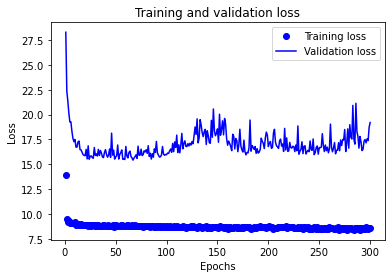

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 최종 모델 훈련하기

In [64]:
model = build_model()
model.fit(x_train, y_train, epochs=25, batch_size=1, verbose=0) # 전체 데이터로 훈련
test_mse_socre, test_mae_score = model.evaluate(x_test, y_test)

27/27 [==============================] - 0s 441us/step - loss: 7.0825 - mae: 2.0687


In [65]:
test_mae_score

2.0687079429626465

## k-겹 검증하기 & 각 폴드에서 검증 점수를 로그에 저장하기

In [29]:
from time import time

now = time()

k = 4

num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [x_train[:i * num_val_samples],
    x_train[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, validation_data=(val_data, val_targets), batch_size=1, verbose=0) # verbose=0이므로 훈련 과정이 출력되지 않습니다.
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print('소요시간:', time() - now)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
소요시간: 540.2895741462708


In [31]:
all_scores

[10.328258514404297, 9.374094009399414, 9.378512382507324, 10.148344993591309]

In [32]:
np.mean(all_scores)

9.807302474975586

## K-겹 검증 점수 평균을 기록하기

In [36]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [37]:
average_mae_history

[9.749420166015625,
 10.096515893936157,
 9.983518123626709,
 9.403005361557007,
 10.171999216079712,
 10.014494180679321,
 9.831748962402344,
 10.237147808074951,
 9.829856872558594,
 10.037078857421875,
 10.369608402252197,
 10.367894887924194,
 9.997313022613525,
 9.960306882858276,
 9.954254150390625,
 9.707690477371216,
 9.71474838256836,
 9.927403450012207,
 9.893332481384277,
 10.218606233596802,
 9.799204587936401,
 9.952880382537842,
 9.961086511611938,
 9.866527557373047,
 10.018632650375366,
 9.750781536102295,
 9.771602869033813,
 10.101972103118896,
 10.042552709579468,
 10.015495777130127,
 9.70323395729065,
 9.751240015029907,
 10.100850582122803,
 10.191240072250366,
 9.959596157073975,
 9.929439544677734,
 10.130214929580688,
 10.144275426864624,
 10.054374694824219,
 9.955147981643677,
 9.987643480300903,
 10.054059267044067,
 10.086687803268433,
 9.997151136398315,
 10.146696090698242,
 9.939436435699463,
 10.248588800430298,
 10.287896156311035,
 10.021493673324585,

## 검증점수 그래프

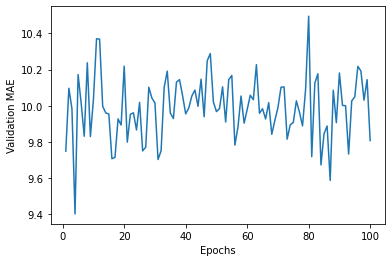

In [49]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [52]:
prediction = model.predict(x_test)

In [53]:
for idx in range(len(prediction)):
    print(prediction[idx], y_test[idx])

[11.912687] 12
[8.540217] 14
[8.990698] 13
[12.567167] 13
[11.626442] 12
[15.493996] 14
[8.506897] 11
[9.59878] 13
[10.203464] 10
[11.864025] 11
[10.543788] 13
[10.981731] 15
[7.3447456] 8
[8.024775] 10
[8.20125] 10
[6.9703617] 6
[9.022415] 8
[7.498088] 5
[23.885422] 20
[15.005371] 19
[8.400533] 9
[8.227311] 9
[10.95661] 10
[8.570133] 11
[8.573002] 11
[7.632538] 5
[20.37208] 17
[14.81598] 13
[22.319471] 17
[9.675738] 12
[8.22637] 10
[13.72888] 16
[16.33547] 19
[10.45587] 10
[9.727384] 10
[6.6298704] 6
[5.9345245] 5
[8.465397] 8
[7.317356] 8
[4.75861] 5
[14.879736] 19
[11.511734] 15
[9.701224] 14
[7.1528015] 7
[9.256181] 13
[14.186811] 13
[15.302916] 18
[11.388364] 13
[13.9503] 16
[9.858742] 10
[14.55431] 13
[14.421745] 19
[14.44977] 10
[13.450691] 13
[18.54707] 13
[17.698553] 18
[12.814797] 12
[7.99555] 9
[7.3376236] 8
[14.833462] 10
[13.773341] 18
[12.595677] 13
[7.959443] 9
[8.934746] 8
[6.261094] 7
[7.924814] 8
[6.510663] 6
[6.937825] 7
[7.098193] 7
[6.9385366] 6
[6.827981] 7
[7.171

## 최종 모델 훈련하기

In [54]:
model = build_model()
model.fit(x_train, y_train, epochs=200, batch_size=16, verbose=0) # 전체 데이터로 훈련
test_mse_socre, test_mae_score = model.evaluate(x_test, y_test)

27/27 [==============================] - 0s 461us/step - loss: 3.3455 - mae: 1.3361


In [55]:
test_mae_score

1.3360704183578491